In [2]:
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np
import os

# Mouth Mask from Landmarks

In [11]:
img_path = '/data/ishan/segmentation_data/mod_seg_datasets/Datatang_Seg/images'
og_mask_path = '/data/ishan/segmentation_data/mod_seg_datasets/Datatang_Seg/standardized_masks'
mask_path = '/data/ishan/segmentation_data/mod_seg_datasets/Datatang_Seg/augmented_masks'
lnmk_path = '/data/ishan/segmentation_data/mod_seg_datasets/Datatang_Seg/landmarks'

img_file_names = sorted([f for f in os.listdir(img_path)])
mask_file_names = sorted([f for f in os.listdir(mask_path)])

img_files = [os.path.join(img_path, file_name) for file_name in img_file_names]
mask_files = [os.path.join(mask_path, file_name) for file_name in mask_file_names]
og_mask_files = [os.path.join(og_mask_path, file_name) for file_name in mask_file_names]
lnmk_files = [os.path.join(lnmk_path, (file_name[:-4] + '.json')) for file_name in img_file_names]


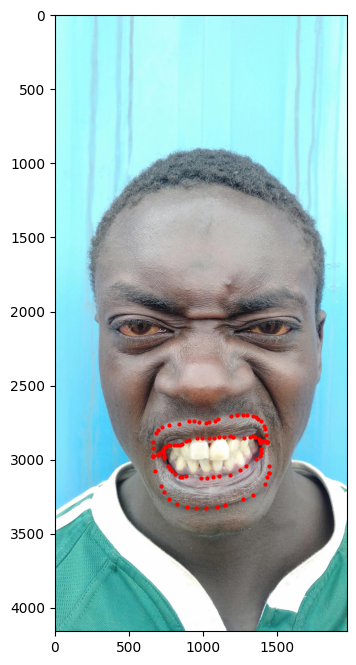

In [20]:
a = 19603
with open(lnmk_files[a], 'r') as file:
    json_data = json.load(file)
img = cv2.imread(img_files[a])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.imread(mask_files[a], cv2.IMREAD_GRAYSCALE)
og_mask = cv2.imread(og_mask_files[a], cv2.IMREAD_GRAYSCALE)

y_coords = []
x_coords = []
for i in range(len(json_data['DataList'])):
    if json_data['DataList'][i]['properties']['currentDataKey'] in ['Upper_lip','Lower_lip']:
        coordinates_ul = json_data['DataList'][i]['coordinates']
        x_coords += [coord[0] for coord in coordinates_ul[0]]
        y_coords += [coord[1] for coord in coordinates_ul[0]]

# x_coords = [coord[0] for data in json_data['DataList'] if data['properties']['currentDataKey'] in ['Upper_lip', 'Lower_lip'] for coord in data['coordinates'][0]]
# y_coords = [coord[1] for data in json_data['DataList'] if data['properties']['currentDataKey'] in ['Upper_lip', 'Lower_lip'] for coord in data['coordinates'][0]]

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize as desired

# Plot points
ax.plot(x_coords, y_coords, 'ro', markersize=2)

# Display the image
plt.imshow(img)
plt.show()

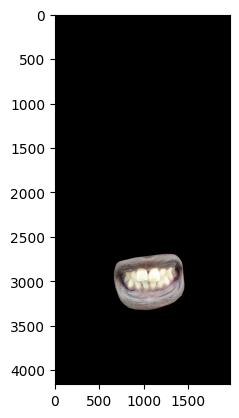

In [21]:
lnmk_list = [[x_i,y_i] for x_i,y_i in zip(x_coords,y_coords) ]
sample_lnmk = np.array(lnmk_list).reshape(-1,1,2)

# # Find the convex hull of the landmarks - To find the smallest closed area that contains all the landmarks
# hull = cv2.convexHull(sample_lnmk, clockwise=True)

# # Create an empty mask image
new_mask = np.zeros(img.shape[:2], dtype=np.uint8)

# Reshape and convert the landmark array
sample_lnmk = np.array(lnmk_list).reshape(-1, 2).astype(np.int32)

# Find the convex hull of the landmarks
hull = cv2.convexHull(sample_lnmk, clockwise=True)

# Draw the convex hull on the mask image
cv2.fillConvexPoly(new_mask, hull, 1)

masked_image = cv2.bitwise_and(img, img, mask=new_mask)
plt.imshow(masked_image)

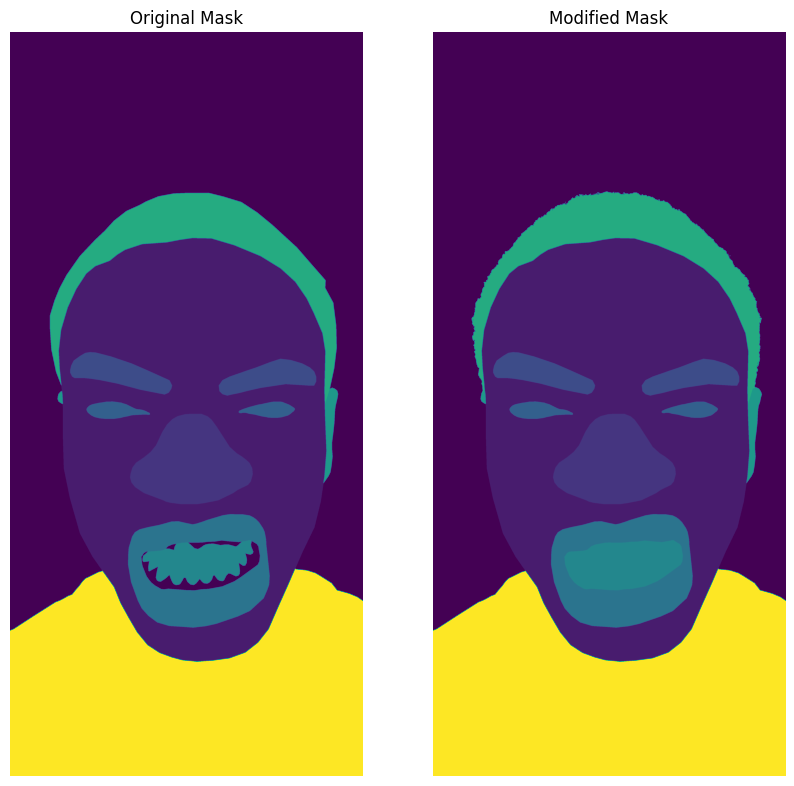

In [22]:
# Creating updated mask with regions within new mask have label 0 corresponding to background
updated_mask = np.where((mask == 0) & (new_mask == 1), 6, mask)

fig, axs = plt.subplots(1,2, figsize=(10,10))
# Display the first image in the first subplot
axs[0].imshow(og_mask)
axs[0].set_title("Original Mask")

# Display the second image in the second subplot
axs[1].imshow(updated_mask)
axs[1].set_title("Modified Mask")

# Remove the axis labels
for ax in axs:
    ax.axis("off")
plt.show()